In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
  value="Click here to toggle on/off the raw code."></form>''')

#### Surface Water Runoff from thawing ice

This is a simple 1D ramp.  It starts initially with a thin layer of ice, which is melted over time.  As the water melts, it flows down the ramp and pools at the low point.

Author: Ethan Coon

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# load the ATS solution
directory = "thermal_surface_water.regression.gold"

dat = column_data.column_data(["ponded_depth", "elevation"],
                              directory=directory, filename="visdump_surface_data.h5", 
                              mesh_filename="visdump_surface_mesh.h5", coord=0)

In [6]:
# plot the solution
def plot(dat):
    cm = colors.cm_mapper(0,dat.shape[1]-1)
    
    x = dat[0,0,:]
    fig, ax = plt.subplots()

    ax.plot(x, dat[2,0,:], 'k')
    for i in range(dat.shape[1]):
        ax.plot(x, dat[2,0,:]+dat[1,i,:], color=cm(i))

    ax.set_xlabel('x-coordinate [m]')
    ax.set_ylabel('z-coordinate [m]')
    plt.tight_layout()
    plt.show()
    

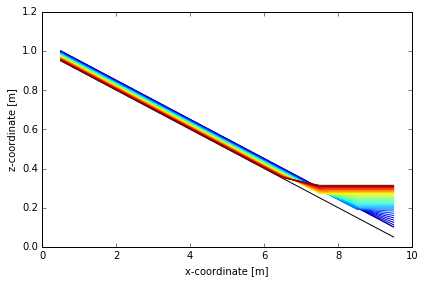

In [7]:
plot(dat)